In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});


<IPython.core.display.Javascript object>

In [15]:
%autosave 30
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 350

Autosaving every 30 seconds


<span style='font-family:"Times New Roman"'> 
<span style="line-height:200%"> 
&emsp;&emsp; Mechanistic home range models (MHRMs) are a useful tool for analyzing patterns of animal space use. Due to their spatially explicit design, MHRMs are often used to generate predictions of animal movement (Moorcroft & Barnett 2008). In Moorcroft & Barnett (2008), the authors illustrate how MHRMs can be used to generate predictions for a simplified case of animal movement; an indivudal moving on a one-dimensional landscape.

&emsp;&emsp; According to Moorcroft & Barnett (2008), an animal moving in a one-dimensional landscape has a preference for various habitat than can be expressed by a resource selection function $w(x)$. Furthermore, Moorcroft & Barnett (2008) dictate that if $w(x)$ is constant (i.e. the animal has no habitat preference), then an animal's movement is based purely on $\phi (x - x')$. Here, $\phi (x - x')$ refers to the probability of an animal moving right or left of its current position $x'$ during time interval $\tau$(Moorcroft & Barnett, 2008). Together, $w(x)$ and $\phi (x - x')$ form a redistrubtion kernel that describes the probability of an animal moving from $x'$ to $x$ over a period $\tau$ in a landscape with varying preference (Moorcroft & Barnett, 2008). Moorcroft & Barnett describe the redistribution kernel as follows:
    
$$ P(x' \longrightarrow x) = k_{\tau}(x,x') = \frac{\phi(x - x')w(x)}{\int_{-\infty}^{\infty} \phi(x'' - x')w(x)dx''}$$

&emsp;&emsp; After defining the redistribution kenrel, Moorcroft & Barnett (2008), provide a definition for $u(x,t)dx$, the "probability that an individual is located between $x$ and $x + dx$ at time $t$." The integral of product of the redistribution kernel and $u(x,t)dx$ yields $u(x,t + \tau)$, an expression that describes all possible ways that an "individual located at $x'$ can arrive within the interval $(x,x+dx)$ at time $t +\tau$" (Moorcroft & Barnett, 2008). In Moorcroft & Barnett (2008), $u(x,t+ \tau)$ is written accordingly:
    
\begin{equation} u(x,t+ \tau) = \int_{-\infty}^{\infty} k_{\tau}(x,x')u(x',t)dx' \end{equation}

&emsp;&emsp; After defining $u(x,t+ \tau)$, Moorcroft & Barnett (2008) re-write Equation 1 in the form of an advection-diffusion equation by employing a Taylor series expansion and taking the limit as $\tau \longrightarrow 0$.
    
# Numerical Solution for the Diffusion Equation in One Dimension
    
&emsp;&emsp; In order to replicate the analysis presented in Moorcroft & Barnett (2008), I began by seeking a numerical solution to the diffusion equation in one dimension. Specifically, I employed the finite difference method as presented in *Computational Aerodynamics and Fluid Dynamics: an Introduction* by Jean-Jacques Chattot (2002). In accordance with Chattot (2002), I started by discretizing the spatial and temporal domains using a set of equally spaced mesh points given by:
   
$$x_i = i\Delta x,      i=0,...,N_x,$$
$$t_j = j \Delta t,     j=0,...,N_t$$ 

&emsp;&emsp; Where $x_i$ was the total number of points of the spatial discretization, $\Delta x$ was the spatial discretization step, $t_j$ was the total number of points of the temporal discretization, and $ \Delta t$ was the temporal discretization step. After discretizing the domains, the derivatives in the diffusion equation can be replaced by finite difference approximations. For the time derivative, Chattot (2002) utilized a forward differene approximation given by:

\begin{equation} \frac{\partial u}{\partial t}= \frac {u_{i,j+1} - u_{i,j}}{\Delta t} \end{equation}

&emsp;&emsp; For the space derivative, Chattot (2002) uses centered difference approximation given by:

\begin{equation}  \frac{{\partial}^2 u}{\partial {x}^2}= \frac {u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x^2} \end{equation}

&emsp;&emsp; Substituting these approximations into the the diffusion equation yields the following:

\begin{equation} \frac {u_{i,j+1} - u_{i,j}}{\Delta t} = k \left(\frac {u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x^2}\right) \end{equation}

&emsp;&emsp; Finally, rearranging terms of equation 3 produced the following finite difference scheme for the numerical solution to the diffusion equation in one dimension:

 \begin{equation} u_{i,j+1} = u_{i,j} + r(u_{i+1,j} -2u_{i,j} + u_{i-1,j}) \end{equation}

&emsp;&emsp; Where $r$, the Fourier number, is given by:

$$r = k \left(\frac {\Delta t}{\Delta x^2}\right)$$

&emsp;&emsp; Using Python version 3.9.13, I implemented the finite difference scheme described above to numerically solve the diffusion equation in one dimension. The first step in my analysis was to specify the bounds of the spatial domain, the bounds of the time domain, $\Delta t$, $\Delta x$, and the mean step length of the animal. Here, I set the bounds of the spatial domain to be $[0,20]$, the bounds of the time domain to be $[0,500]$, $\Delta t$ to be 0.01, and $\Delta x$ to be 0.05.

&emsp;&emsp; Additionally, the mean step length of the animal is assumed to be 0.04. Ideally, the mean step length of the animal should be obtained from observations of the animal's movement in the wild (Conversation with Paul Moorcroft). However in the absence of movement data, a "realistic" choice for the mean step length can be used (Conversation with Paul Moorcroft). If we assume here that $\Delta t$ has units of hours and $\Delta x$ has units of kilometers, then a mean step length of 0.04 would correspond to a movement speed of $4 \frac{km}{hour}$. Depending on the animal, a movement speed of $4 \frac{km}{hour}$ may or may not be realistic.
    
```python
# Domain Bounds
start = 0 # start bound
stop = 20 # stop bound

# Model Parameters
dt = 0.01 # delta t
T = 500 # total time
Nt = int(T / dt)  # number of time steps
dx = 0.05  # delta x
Nx = int((abs(stop-start))/dx)  # number of x steps
mean_sl = 0.04 # mean step length of the animal
k = (mean_sl**2)/2/dt # diffusion coefficient equal to mean step length squared
r = k * dt / dx / dx  # Fourier number
```
&emsp;&emsp; The stability of the finite difference scheme is sensitive to certian choices of $\Delta t$, $\Delta x$, and mean step length. In order to avoid numerical instability, the fourier number, $r$, must obey the following inequality:

$$r = k \left(\frac {\Delta t}{\Delta x^2}\right) < \frac{1}{2}$$

&emsp;&emsp; As such, the Python script contains a flag to warn the user if the current choices of $\Delta t$, $\Delta x$, and mean step length will yield numerical instability.

```python
# Fourier number flag
if r > 0.5:
    print("WARNING: Fourier number > 0.5")
```
&emsp;&emsp; After specifying the model parameters and checking that the stability conditions are satisfied, the spatial and temporal domains are discretized using a numpy array. The number of rows in the array are given by the number of time-steps, $N_t$, as specified above. The number of columns in the array are given by the number of x-steps, $N_x$, also specified above. In each cell of the array, the spatial position, $x_i$, and the probability density at position $x_i$ and time $t_j$, given by $u(x_i,t_j)$, are stored.

```python
# Initializing x values where u(x,t) will be calculated
Xs = np.arange(start, stop + dx, dx)

# Initializing array with Nt rows, Nx columns, and [x,u(x,t)] per cell
u = np.zeros((Nt, 2, len(Xs)))

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs
```
&emsp;&emsp; For the inital conditions, I chose to use a gaussian function defined by $\mu = 10$ and $\sigma = 0.5$. Because this script models the evolution of a probability density function (PDF), a guassian initial condition is appropriate since guassian functions always integrate to 1.  

```python
# Gaussian function used to specify initial conditions
def gaussian(x, mu, sigma):
    denom = sigma * ((2 * math.pi)**0.5)
    numerator = math.exp(((x - mu)**2) / ((sigma) **2) / -2)
    res = numerator / denom
    return res 

# Specifying inital conditions
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                     mu = 10,
                    sigma = 0.5) 
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC 
```
&emsp;&emsp; After discretizng the temporal and spatial domains as well as specifying the inital conditions, the script numerically solves for $u(x,t)$ at future timesetps uisng the finite difference scheme described by Equation 4. When executing the finite difference scheme in Equation 4, the choice of boundary conditions is extremely important. Dirichlet boundary conidions should be avoided because such boundary conditions do not allow for conservation of area under the curve. Because we are modeling the evolution of a PDF, the area under the curve should always be equal to 1. Zero-flux neumann boundary conditions are a more appropriate choice, as they allow for conservation of area under the curve, but such boundary conditions are difficult to execute in code. 

&emsp;&emsp; Here, I opted to use periodic boundary conditions. Like the neumann boundary conditions, periodic boundary conditions allow for the area under the curve to be conserved which is necessary when modeling the evolution of a PDF. However, it should be noted that periodic boundary conditions may be unlikely in a biological context due to the fact that the bounds of the domain are assumed to be physically connected. 

```python
# Explicit finite difference scheme for diffusion
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if i == 0:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx])
        elif i == Nx:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1])
        else:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])
```

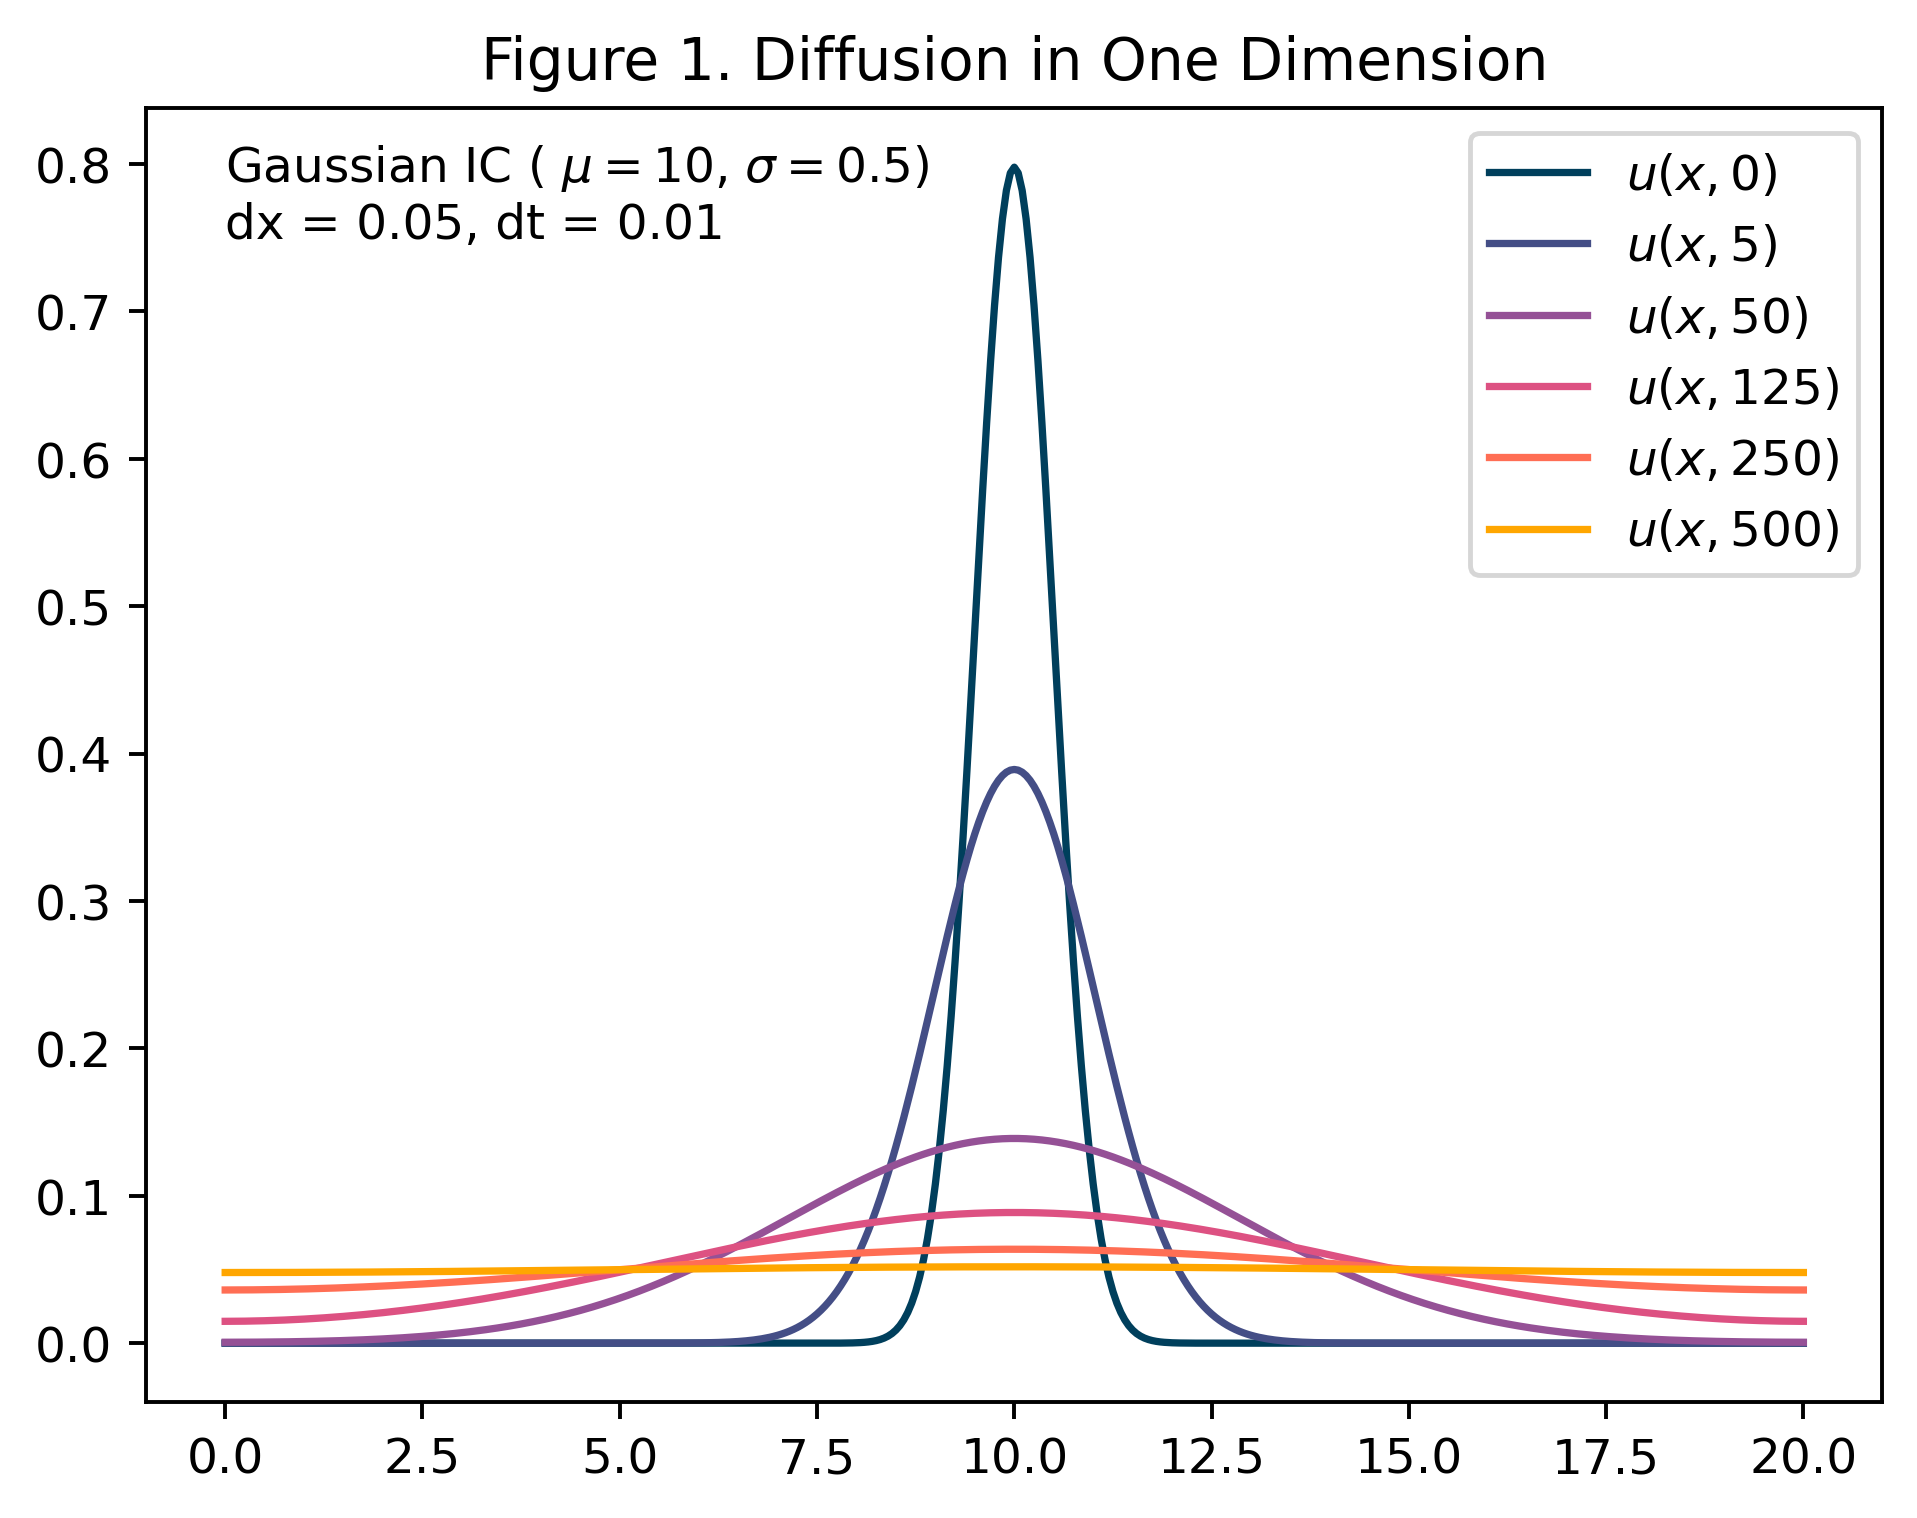

Area under u(x,0) = 1.0000000000000004
Area under u(x,100) = 0.9995508154016008
Area under u(x,200) = 0.9985210787796398
Area under u(x,300) = 0.9979724740159428
Area under u(x,400) = 0.9977189148875474
Area under u(x,500) = 0.9976031859309636


In [3]:
# Domain Bounds
start = 0 # start bound
stop = 20 # stop bound

# Model Parameters
dt = 0.01 # delta t
T = 500 # total time
Nt = int(T / dt)  # number of time steps
dx = 0.05  # delta x
Nx = int((abs(stop-start))/dx)  # number of x steps
mean_sl = 0.04 # mean step length of the animal
k = (mean_sl**2)/2/dt # diffusion coefficient equal to mean step length squared
r = k * dt / dx / dx  # Fourier number

# Fourier number flag
if r > 0.5:
    print("WARNING: Fourier number > 0.5")

# Initializing x values where u(x,t) will be calculated
Xs = np.arange(start, stop + dx, dx)

# Initializing array with Nt rows, Nx columns, and [x,u(x,t)] per cell
u = np.zeros((Nt, 2, len(Xs)))

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

# Gaussian function used to specify initial conditions
def gaussian(x, mu, sigma):
    denom = sigma * ((2 * math.pi)**0.5)
    numerator = math.exp(((x - mu)**2) / ((sigma) **2) / -2)
    res = numerator / denom
    return res 

# Specifying inital condition
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                     mu = 10,
                    sigma = 0.5) 
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC 

# Explicit finite difference scheme for diffusion
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if i == 0:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx])
        elif i == Nx:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1])
        else:
            u[j + 1][1][i] = u[j][1][i] + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])
            
# Diffusion Plot
t0 = u[0][1]
t1 = u[int(0.01*Nt)][1]
t2 = u[int(0.1*Nt)][1]
t3 = u[int(0.25*Nt)][1]
t4 = u[int(0.5*Nt)][1]
t5 = u[int(Nt-1)][1]

plt.figure()
plt.plot(Xs,t0, label = r'$u(x,0)$', color = "#003f5c" )
plt.plot(Xs,t1, label = fr'$u(x,{int(0.01*T)})$', color = "#444e86")
plt.plot(Xs,t2, label = fr'$u(x,{int(0.1*T)})$', color = "#955196")
plt.plot(Xs,t3, label = fr'$u(x,{int(0.25*T)})$', color = "#dd5182")
plt.plot(Xs,t4, label = fr'$u(x,{int(0.5*T)})$', color = "#ff6e54")
plt.plot(Xs,t5, label =fr'$u(x,{int(T)})$', color = "#ffa600")
plt.legend(loc="upper right")
plt.text(0,0.75,"Gaussian IC ( " + r'$\mu = 10$' + ", " + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}")
plt.title("Figure 1. Diffusion in One Dimension")
plt.show()

# Integration function using the trapezoid method
def integrate(u,dx,x_vals):
    area_under_curve = 0
    for i in range(0,len(x_vals)-1):
        area = dx * (u[i+1]+u[i]) / 2
        area_under_curve = area_under_curve + area
    return area_under_curve

# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

<span style='font-family:"Computer Modern"'> 
<span style="line-height:200%"> 
    
&emsp;&emsp; Figure 1 shows numerical solutions of $u(x,t)$ generated by Equation 4 at $t = 5, t = 50, t = 125, t = 250,$ and $t = 500$ as well as the inital condition at $t = 0$. By $t = 300$, $u(x,t)$ appears to have flattened out which is expected when movement is only due to diffusive flux. However, calculations of the integral of $u(x,t)$ at $t = 5, t = 50, t = 125, t = 250,$ and $t = 500$ reveal a slight loss of area under the curve with each time step. As such, future work on this model should involve the implementation of numerical solutions to the diffusion equation that better conserve the area under the curve.

&emsp;&emsp; After developing a numerical solver for the diffusion equation in one dimension, the next step in replicating the findings of Moorcroft & Barnett 2008 was to develop a process for numerically solving the advection equation in one dimension. Details on the development of a numerical solution for the advection equation in one dimension are described in the following section.
      
# Numerical Solution for the Advection Equation in One Dimension

&emsp;&emsp; While Moorcroft & Barnett (2008) defines advection speed based on the spatial distribution of resources, I started with the simpler case of moedling advection with constant speed. 

## Advection with Constant Speed: First-Order Upwinding Approximation

&emsp;&emsp; The process used to construct a numerical solution for the advection equation with constant speed is highly similar to the process I used to construct a numerical solution for the diffusion equation which I desribed in the previous section. Following Chattot (2002), I discretized my domain using a set of equally spaced mesh points in the same way that I did for the diffusion equation. Similarly, I then replaced the derivatives in the advection equation using finite difference approximations. As I did for the diffusion equation, I used a forward difference approximation for the time derivate (Equation 1). However, instead of using a centered difference approximation like I did for the spatial derivative in the diffusion equation, the spatial derivative in the advection equation was approximated using an upwinding approach (Chattot, 2002). My first attempt at numerically solving the advection equation relied on a first-order upwinding approximation for the spatial derivative given by:

\begin{equation} \frac{\partial u}{\partial x} = \frac {u_{i,j} - u_{i-1,j}}{\Delta x} \; \; \text{if c > 0}\end{equation}

\begin{equation} \frac{\partial u}{\partial x} = \frac {u_{i+1,j} - u_{i,j}}{\Delta x} \; \; \text{if c < 0}\end{equation}
                                                                                                                     
&emsp;&emsp; Which substituting into the PDE along with the forward difference approximation of the time derivative yielded:

\begin{equation} \frac {u_{i,j+1} - u_{i,j}}{\Delta t} = -c \left(\frac {u_{i,j} - u_{i-1,j}}{\Delta x}\right) \; \; \text{if c > 0} \end{equation}

\begin{equation} \frac {u_{i,j+1} - u_{i,j}}{\Delta t} = -c \left(\frac {u_{i+1,j} - u_{i,j}}{\Delta x}\right) \; \; \text{if c < 0} \end{equation}

&emsp;&emsp; Finally, re-arranging terms produced the following finite difference scheme for the numerical solution of the advection equation in one dimension:

\begin{equation} u_{i,j+1} = u_{i,j} - \rho (u_{i,j} - u_{i-1,j}) \; \; \text{if c > 0}\end{equation}

\begin{equation} u_{i,j+1} = u_{i,j} - \rho (u_{i+1,j} - u_{i,j}) \; \; \text{if c < 0}\end{equation}

&emsp;&emsp; Where $\rho$, the Courant number, is given by:

$$\rho = c \left(\frac {\Delta t}{\Delta x}\right)$$

&emsp;&emsp; After defining a finite difference scheme for the numerical solution of the advection equation in one dimension, I then specified the bounds the spatial domain, the bounds of the time domain, $\Delta t$, $\Delta x$, and the velocity of the animal. Here, I set the bounds of the spatial domain to be $[0,50]$, the bounds of the time domain to be $[0,300]$, $\Delta t$ to be $0.01$, $\Delta x$ to be $0.05$, and velocity, $c$, to be $0.1$.

```python
# Bounds
start = 0 # start bound
stop = 50 # stop bound

# Model parameters
dt = 0.01 # delta t
dx = 0.05  # delta x
T = 300 # Total time
Nt = int(T / dt)  # Number of time steps
Nx = int((abs(stop-start))/dx)  # Number of x steps
c = 0.1 # advections speed
p = c * dt / dx /2 # courant number
```

&emsp;&emsp; Like the finite difference scheme for the diffusion equation described above, the stability of the finite difference scheme for the advection equation is sensitive to choices of various inputs. Specifically, the finite difference scheme for the advection equation is sensitive to certain choices for $\Delta t$, $\Delta x$, and $c$. In order to avoid numerical instability, the Courant number, $\rho$, must obey the Courant-Freidrichs-Lewy condition (Chattot, 2002):

$$\rho = c \left(\frac {\Delta t}{\Delta x}\right) < 1$$

&emsp;&emsp; As such, the Python script contains a flag to warn the user if the current values of $\Delta t$, $\Delta x$, and  $c$ will yield numerical instability.



```python
# CFL flag
if p > 1:
    print("WARNING: Courant number > 1")
```                                                                                                     

<span style='font-family:"Computer Modern"'> 
<span style="line-height:200%"> 
    
&emsp;&emsp; In an identical fashion to the diffusion example described in the previous section, the spatial and temporal domains are discretized using a numpy array with $N_t$ rows and $N_x$ columns. In each cell of the array, the spatial position, $x_i$, and the probability density at position $x_i$ and time $t_j$, $u(x_i,t_j)$, are stored. Additionally, I continued to use a guassian initial condition, this time with $\mu = 10$ and $\sigma = 0.6$                                                                                                     

&emsp;&emsp; After discretizng domains and specifying the inital conditions, the script numerically solves for $u(x,t)$ at future timesetps uisng the finite difference scheme described by Equations 9 and 10. Again, periodic boundary conditions are used.                                                                    
                                                                                                     
```python    
# First-order upwinding scheme
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if i == 0:
            u[j+1][1][i] = u[j][1][i] - p * (u[j][1][i] - u[j][1][-1])
        else:
            u[j + 1][1][i] = u[j][1][i] - p * (u[j][1][i] - u[j][1][i - 1])
```    

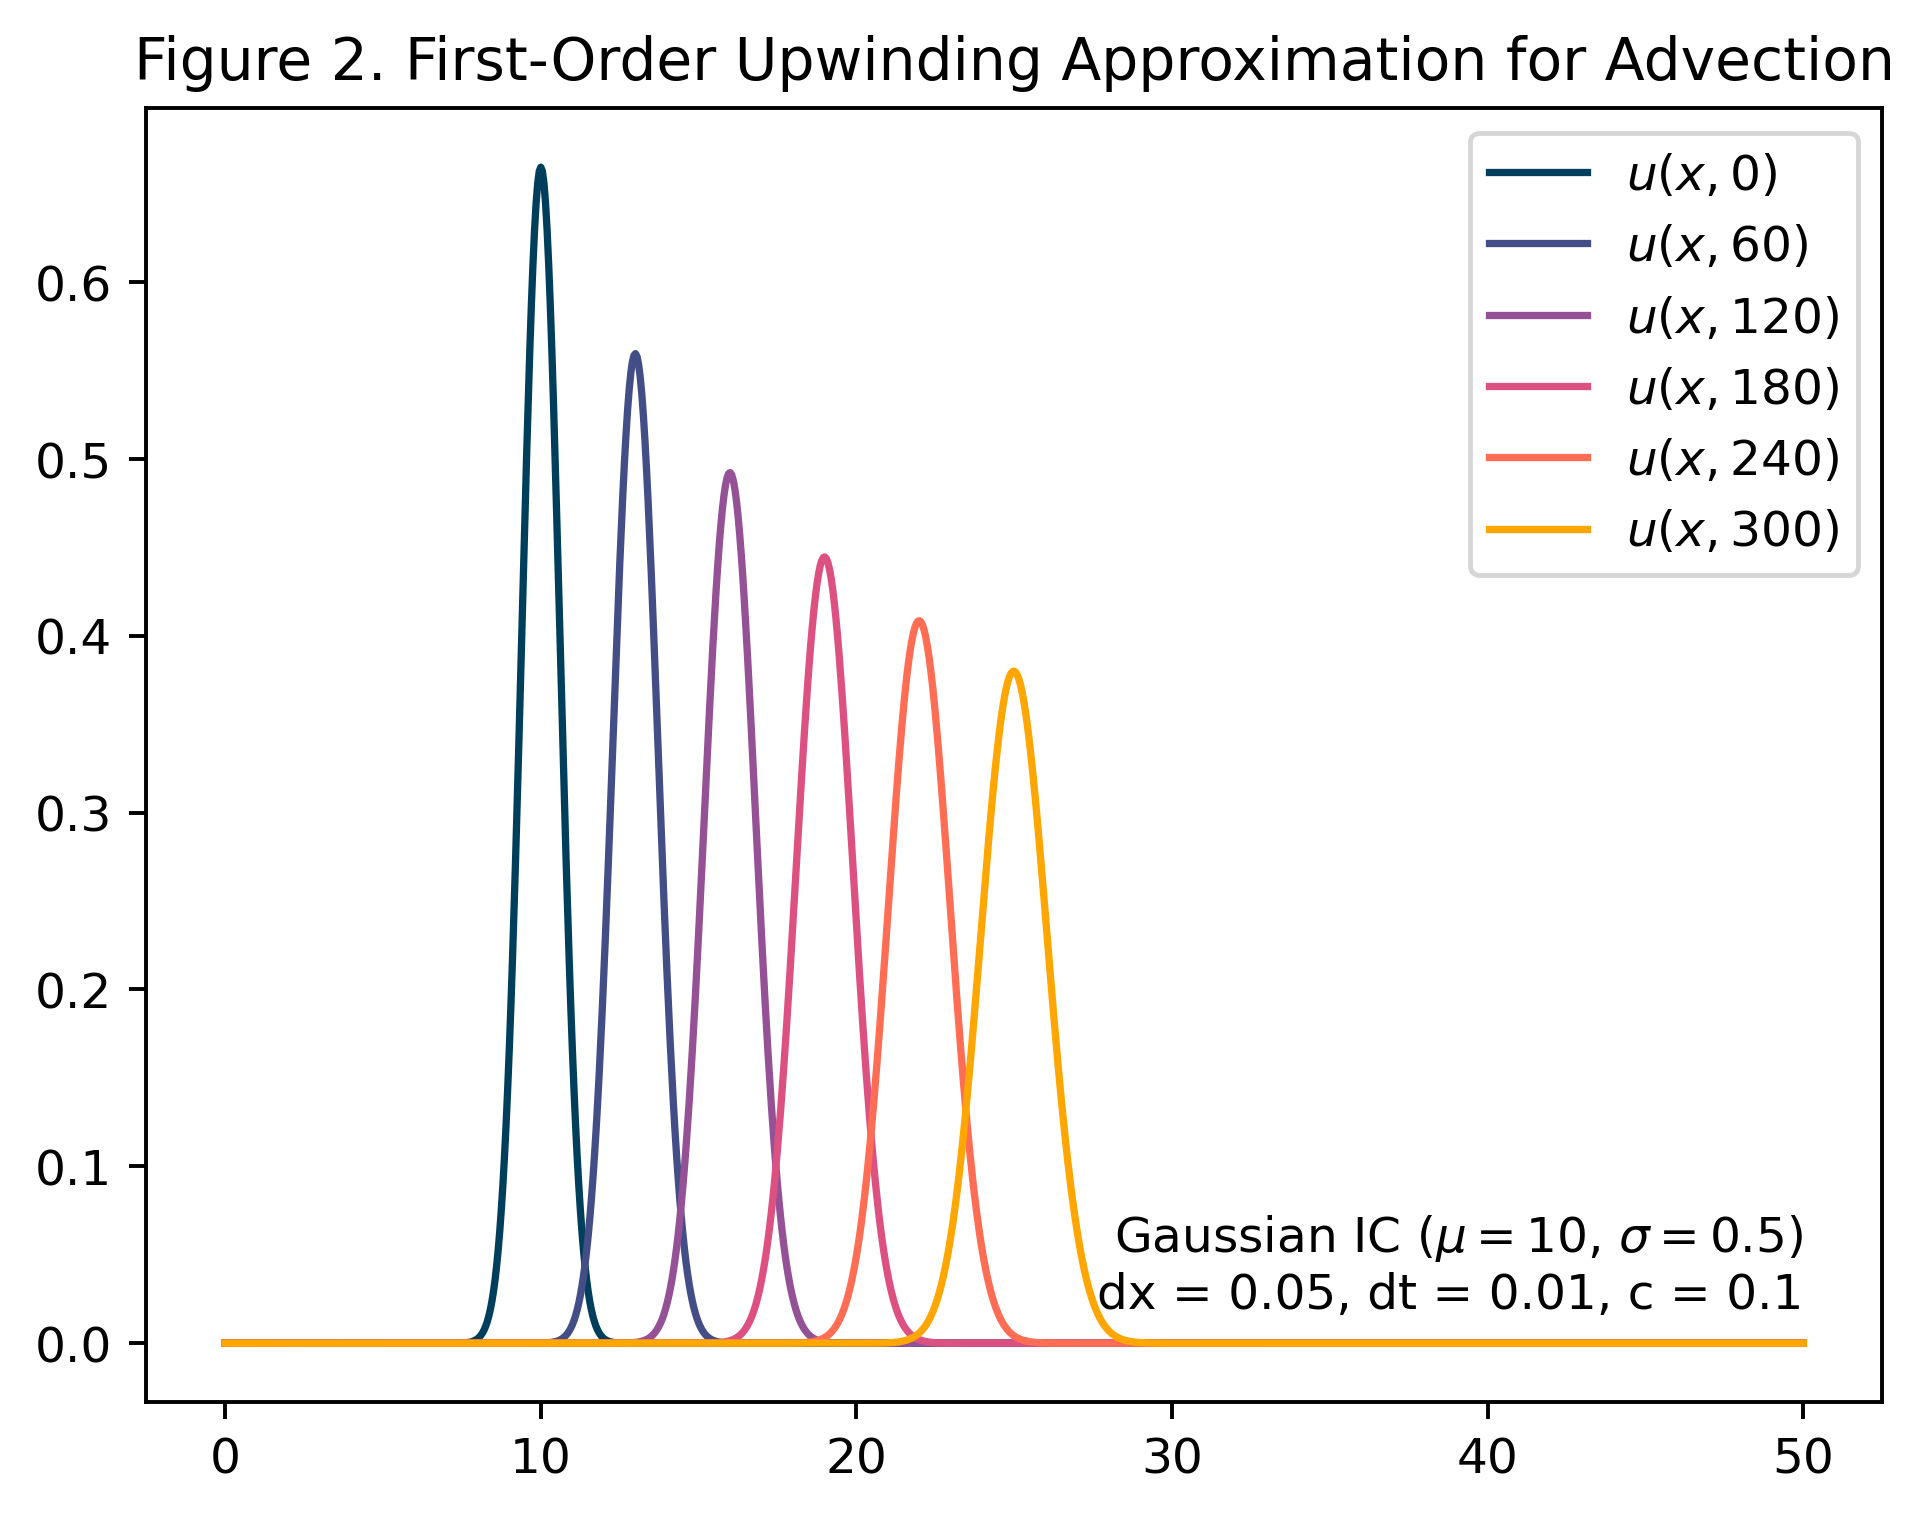

Area under u(x,0) = 0.9999999999999998
Area under u(x,60) = 1.0
Area under u(x,120) = 1.0
Area under u(x,180) = 1.0
Area under u(x,240) = 1.0000000000000002
Area under u(x,300) = 1.0000000000000002


In [4]:
#Advection First Order Upwinding with Constant Speed

# Bounds
start = 0 # start bound
stop = 50 # stop bound

# Model parameters
dt = 0.01 # delta t
dx = 0.05  # delta x
T = 300 # Total time
Nt = int(T / dt)  # Number of time steps
Nx = int((abs(stop-start))/dx)  # Number of x steps
c = 0.1 # advections speed
p = c * dt / dx /2 # courant number

# CFL flag
if p > 1:
    print("WARNING: Courant number > 1")

# Initializing x values where u(x,t) will be calculated
Xs = np.arange(start, stop + dx, dx)

# Initializing array with Nt, Nx columns, and [x,u(x,t)] per cell
u = np.zeros((Nt, 2, len(Xs)))

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

# Specifing inital condition
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                   mu = 10,
                   sigma = 0.6) 
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC 

# First-order upwinding scheme
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if i == 0:
            u[j+1][1][i] = u[j][1][i] - p * (u[j][1][i] - u[j][1][-1])
        else:
            u[j + 1][1][i] = u[j][1][i] - p * (u[j][1][i] - u[j][1][i - 1])

# First-order upwinding scheme advection plot
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

plt.figure()
plt.plot(Xs,t0, label = r'$u(x,0)$', color = "#003f5c" )
plt.plot(Xs,t1, label = fr'$u(x,{int(0.2*T)})$', color = "#444e86")
plt.plot(Xs,t2, label = fr'$u(x,{int(0.4*T)})$', color = "#955196")
plt.plot(Xs,t3, label = fr'$u(x,{int(0.6*T)})$', color = "#dd5182")
plt.plot(Xs,t4, label = fr'$u(x,{int(0.8*T)})$', color = "#ff6e54")
plt.plot(Xs,t5, label =fr'$u(x,{int(T)})$', color = "#ffa600")
plt.legend(loc="upper right")
plt.text(50,0.02,"Gaussian IC (" + r'$\mu = 10$' + ", " + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}, c = {c}", ha = 'right')
plt.title("Figure 2. First-Order Upwinding Approximation for Advection")
plt.show()

# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

<span style='font-family:"Computer Modern"'> 
<span style="line-height:200%"> 
&emsp;&emsp; Figure 2 illustrates numerical solutions of $u(x,t)$ generated by Equation 4 at $t = 5, t = 50, t = 125, t = 250,$ and $t = 500$ as well as the inital condition at $t = 0$. While the area under the curve is conserved as the PDF evolves over time, the PDF exhibits some concerning behaviors that do not follow what is predicted by the analytical solution of the simple advection equation. The simple advection equation is given by:
    $$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$
&emsp;&emsp; And its solution is:
    $$\phi (x-ct)$$

&emsp;&emsp; According to the simple advection equation, if $c$ is constant, the solution at future time steps is the profile of the initial condition shifted by $ct$ units in space. However, as can be seen in Figure 2, the numerical solution presented in Equations 9 and 10 does not exhibit the same behavior as the analytical solution of the simple advection equation. Specifically, the initial profile does not maintain the same shape as $t$ increases nor does the profile at future timesteps move left to right by $ct$ units. In an attempt to achieve greater compliance with the analytical solution of the simple advection equation, I tried replacing the first-order upwinding approximation for the spatial derivative with a second-order upwinding approximation.

## Advection with Constant Speed: Second-Order Upwinding Approximation
    
&emsp;&emsp; According to Shyy (1985), finite difference schemes employing a second-order upwinding approximation preform better than those relying on a first-order upwinding appromxation. Keeping with Shyy (1985), a second-order upwinding approximation of the spatial derivative is defined as:
    
\begin{equation} \frac{\partial u}{\partial x} = \frac {3u_{i,j} - 4u_{i-1,j} + u_{i-2,j}}{2 \Delta x} \; \; \text{if c > 0}\end{equation}

\begin{equation} \frac{\partial u}{\partial x} = \frac {-u_{i+2,j} + 4u_{i+1,j} -3u_{i,j}}{2 \Delta x} \; \; \text{if c < 0}\end{equation}
                                                                                                                       
&emsp;&emsp; Substituting Equations 11 and 12 along with Equation 1 into the simple advection equation yields:
                                                                                                                       \begin{equation} u_{i,j+1} = u_{i,j} - \rho (3u_{i,j} - 4u_{i-1,j} + u_{i-2,j}) \; \; \text{if c > 0}\end{equation}

\begin{equation} u_{i,j+1} = u_{i,j} - \rho (-u_{i+2,j} + 4u_{i+1,j} -3u_{i,j}) \; \; \text{if c < 0}\end{equation}   
                                                                                                                   
&emsp;&emsp; Where $\rho$, the Courant number, is now given by:

$$\rho = c \left(\frac {\Delta t}{2 \Delta x}\right)$$                                                                 
                                                                                                                   
&emsp;&emsp; The finite difference scheme given by Equations 13 and 14 are implemented in Python with period boundary conditions via the following code:

```python                                                                                                           
# Second-order upwinding approach
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            else:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i])
```                                                                                                    

Area under u(x,0) = 0.9999999999999998
Area under u(x,60) = 0.9999999999999993
Area under u(x,120) = 1.0000000000000002
Area under u(x,180) = 1.0000000000000013
Area under u(x,240) = 1.0000000000000002
Area under u(x,300) = 0.9999999999999998


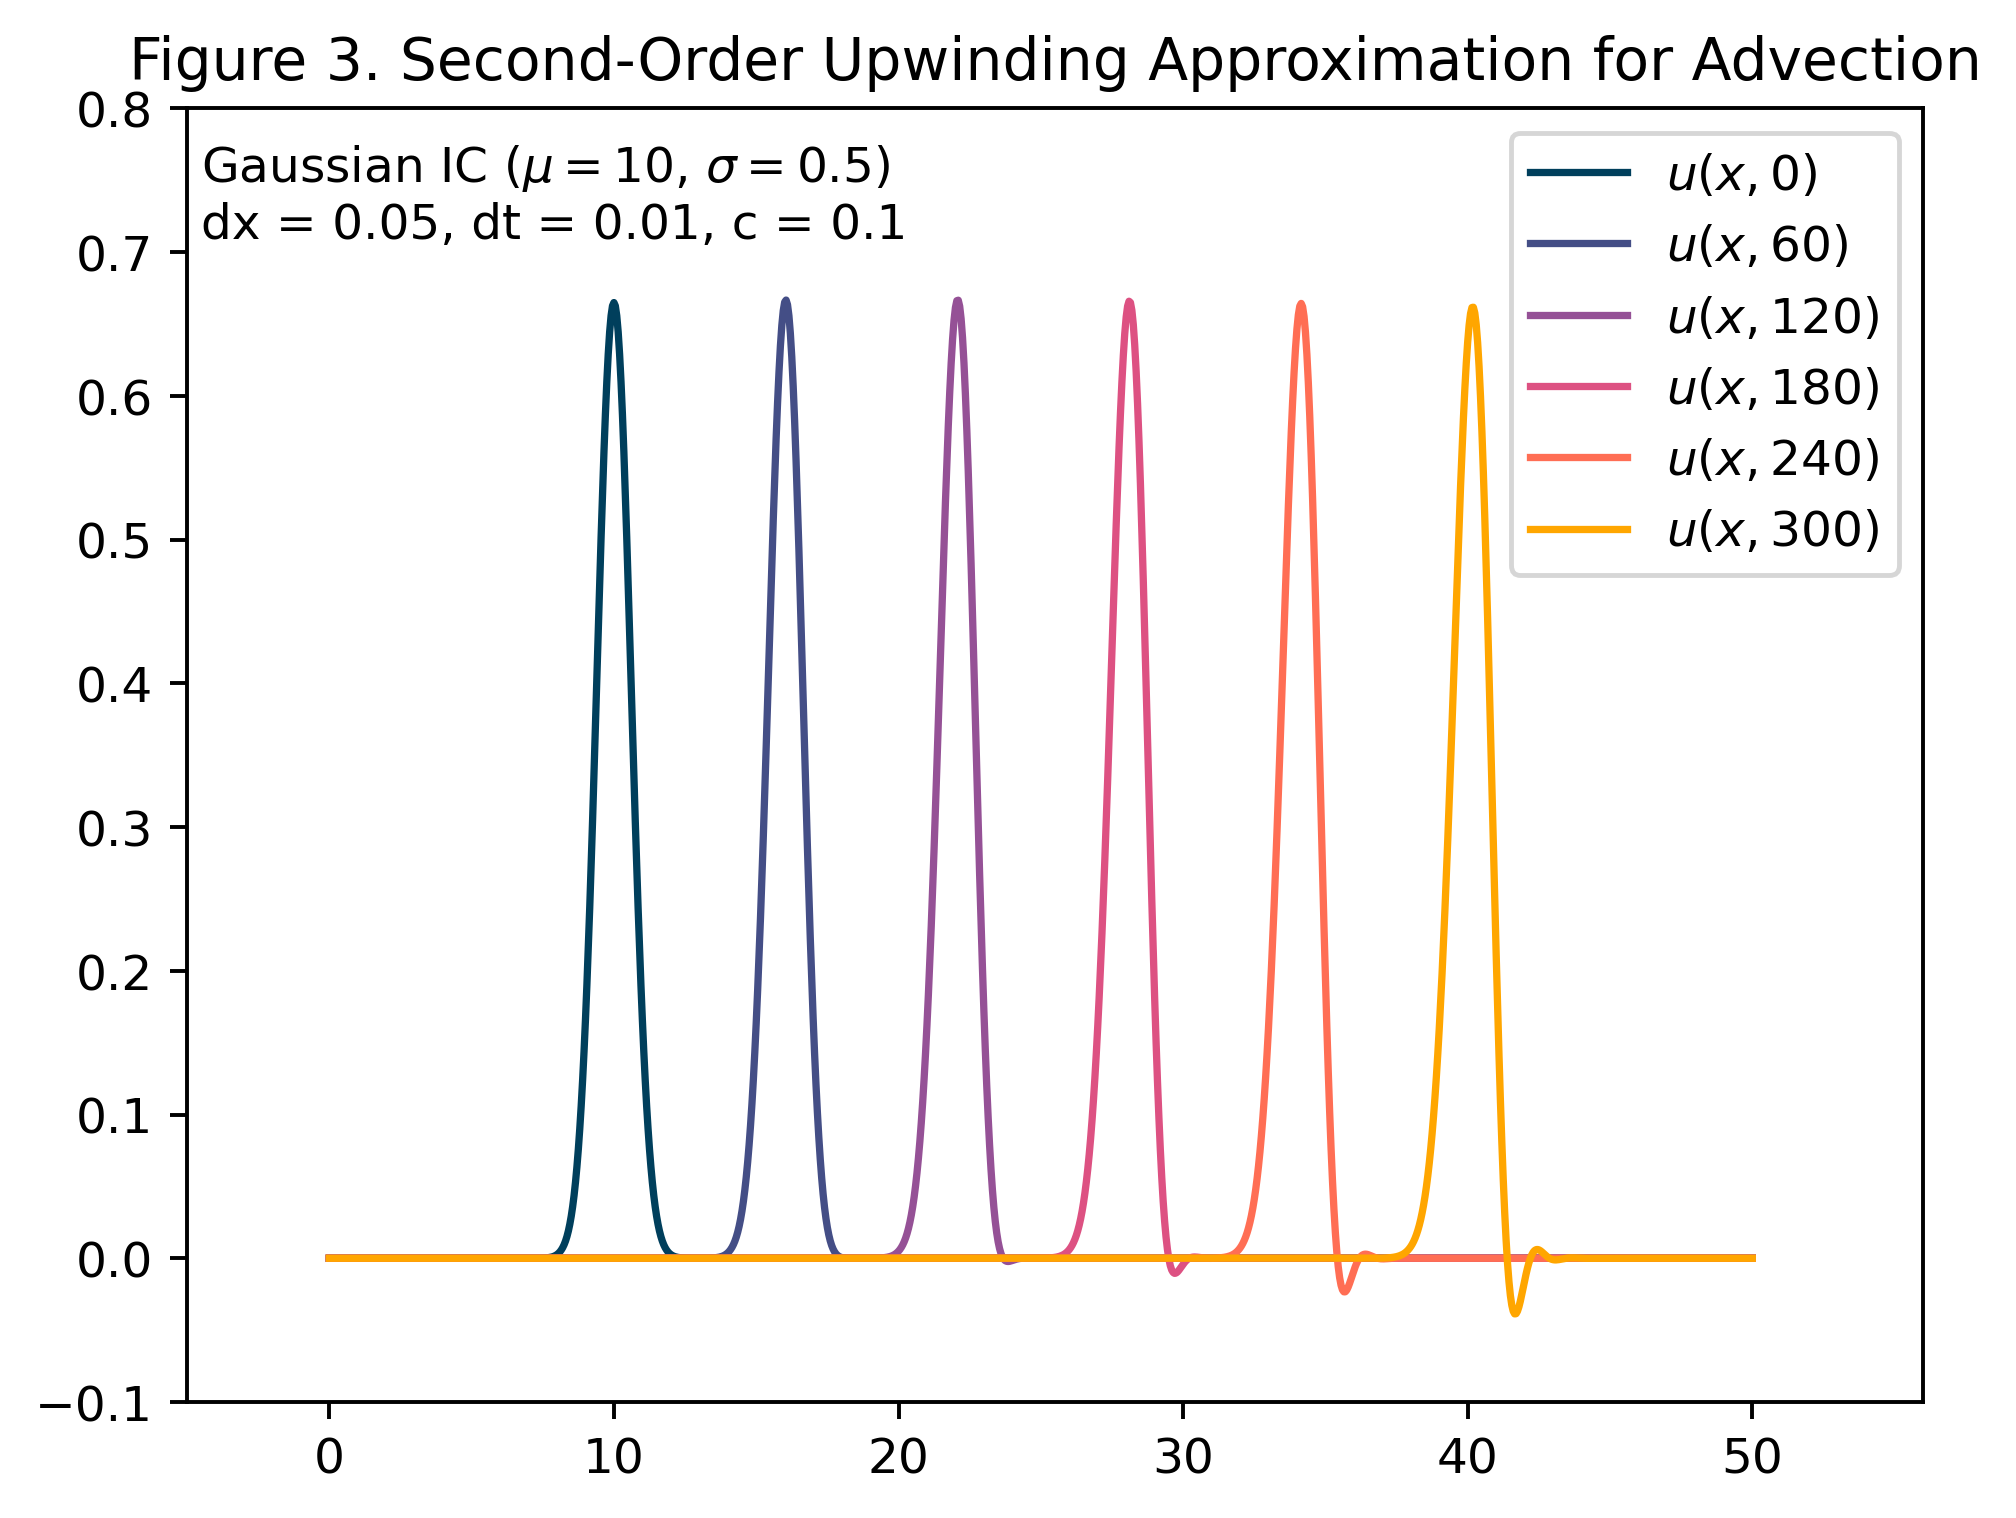

In [5]:
### Second-Order Upwinding Approach

# Second-order upwinding approach
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            else:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i])

# Second-order upwinding scheme advection plot
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

fig3, ax3 = plt.subplots()
ax3.plot(Xs,t0, label = r'$u(x,0)$', color = "#003f5c" )
ax3.plot(Xs,t1, label = fr'$u(x,{int(0.2*T)})$', color = "#444e86")
ax3.plot(Xs,t2, label = fr'$u(x,{int(0.4*T)})$', color = "#955196")
ax3.plot(Xs,t3, label = fr'$u(x,{int(0.6*T)})$', color = "#dd5182")
ax3.plot(Xs,t4, label = fr'$u(x,{int(0.8*T)})$', color = "#ff6e54")
ax3.plot(Xs,t5, label =fr'$u(x,{int(T)})$', color = "#ffa600")
ax3.legend(loc="upper right")
ax3.text(-4.5,0.71,"Gaussian IC (" + r'$\mu = 10$' + 
         ", " + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}, c = {c}", ha = 'left')
ax3.set_title("Figure 3. Second-Order Upwinding Approximation for Advection")
ax3.axis(xmin = -5, xmax = 56, ymin = -0.1, ymax = 0.8)

# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

<span style='font-family:"Computer Modern"'> 
<span style="line-height:200%"> 

&emsp;&emsp; A comparison of Figure 2 with Figure 3 supports the finding in Shyy (1985) that second-order upwinding provides a more accurate approximation of the spatial derivative than first order upwinding. Based on Figure 2, the use of second-order upwinding conserves the shape of the inital density profile and results in the profile shifting by $ct$ units as $t$ increases (in acoordance with the analytical solution of the simple advection equation). However, second-order upwinding generated some numerical instability which is visible in Figure 2 starting at $t = 120$. Ideally, a more numerically stable method of solving the simple advection equation should be used, but given the time constraints of this project a second-order upwinding approximation was the best scheme that I was able to implement for numerically solving the advection equation.

## Advection with Variable Speed
    
&emsp;&emsp; After identifying a finite difference scheme for modeling advection with constant speed, I then moved on to tackling the more biologically relevant problem of modeling advection with variable speed.  

In [6]:
# Habitat Preference
def preference(x):
    pi = math.pi
    res = 0.1 + math.sin(2 * pi * x / 50) ** 2 
    return res

# Derivative of Habitat Preference Function
def preference_slope(x):
    pi = math.pi
    res = (2 * pi / 25) * math.cos(pi * x / 25) * math.sin(pi * x / 25)
    return res

In [7]:
#Habitat Preference Function
w = np.zeros((1,2,len(Xs)))
w[0][0] = Xs
for i in range(0,len(Xs)):
    w[0][1][i] = preference(w[0][0][i])

#Spatial Derivative of Habitat Preference Function
wx = np.zeros((1,2,len(Xs)))
wx[0][0] = Xs
for i in range(0,len(Xs)):
    wx[0][1][i] = preference_slope(w[0][0][i])

In [8]:
# Specifing inital condition
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                   mu = 23,
                   sigma = 0.6) 
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC 

In [9]:
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        c = (mean_sl**2) * wx[0][1][i] / w[0][1][i] / dt  # Advection coefficient
        p = c * dt / dx /2 # Courant number
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            else:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i])

(10.0, 30.0, -0.16362780425486434, 1.160172752583565)

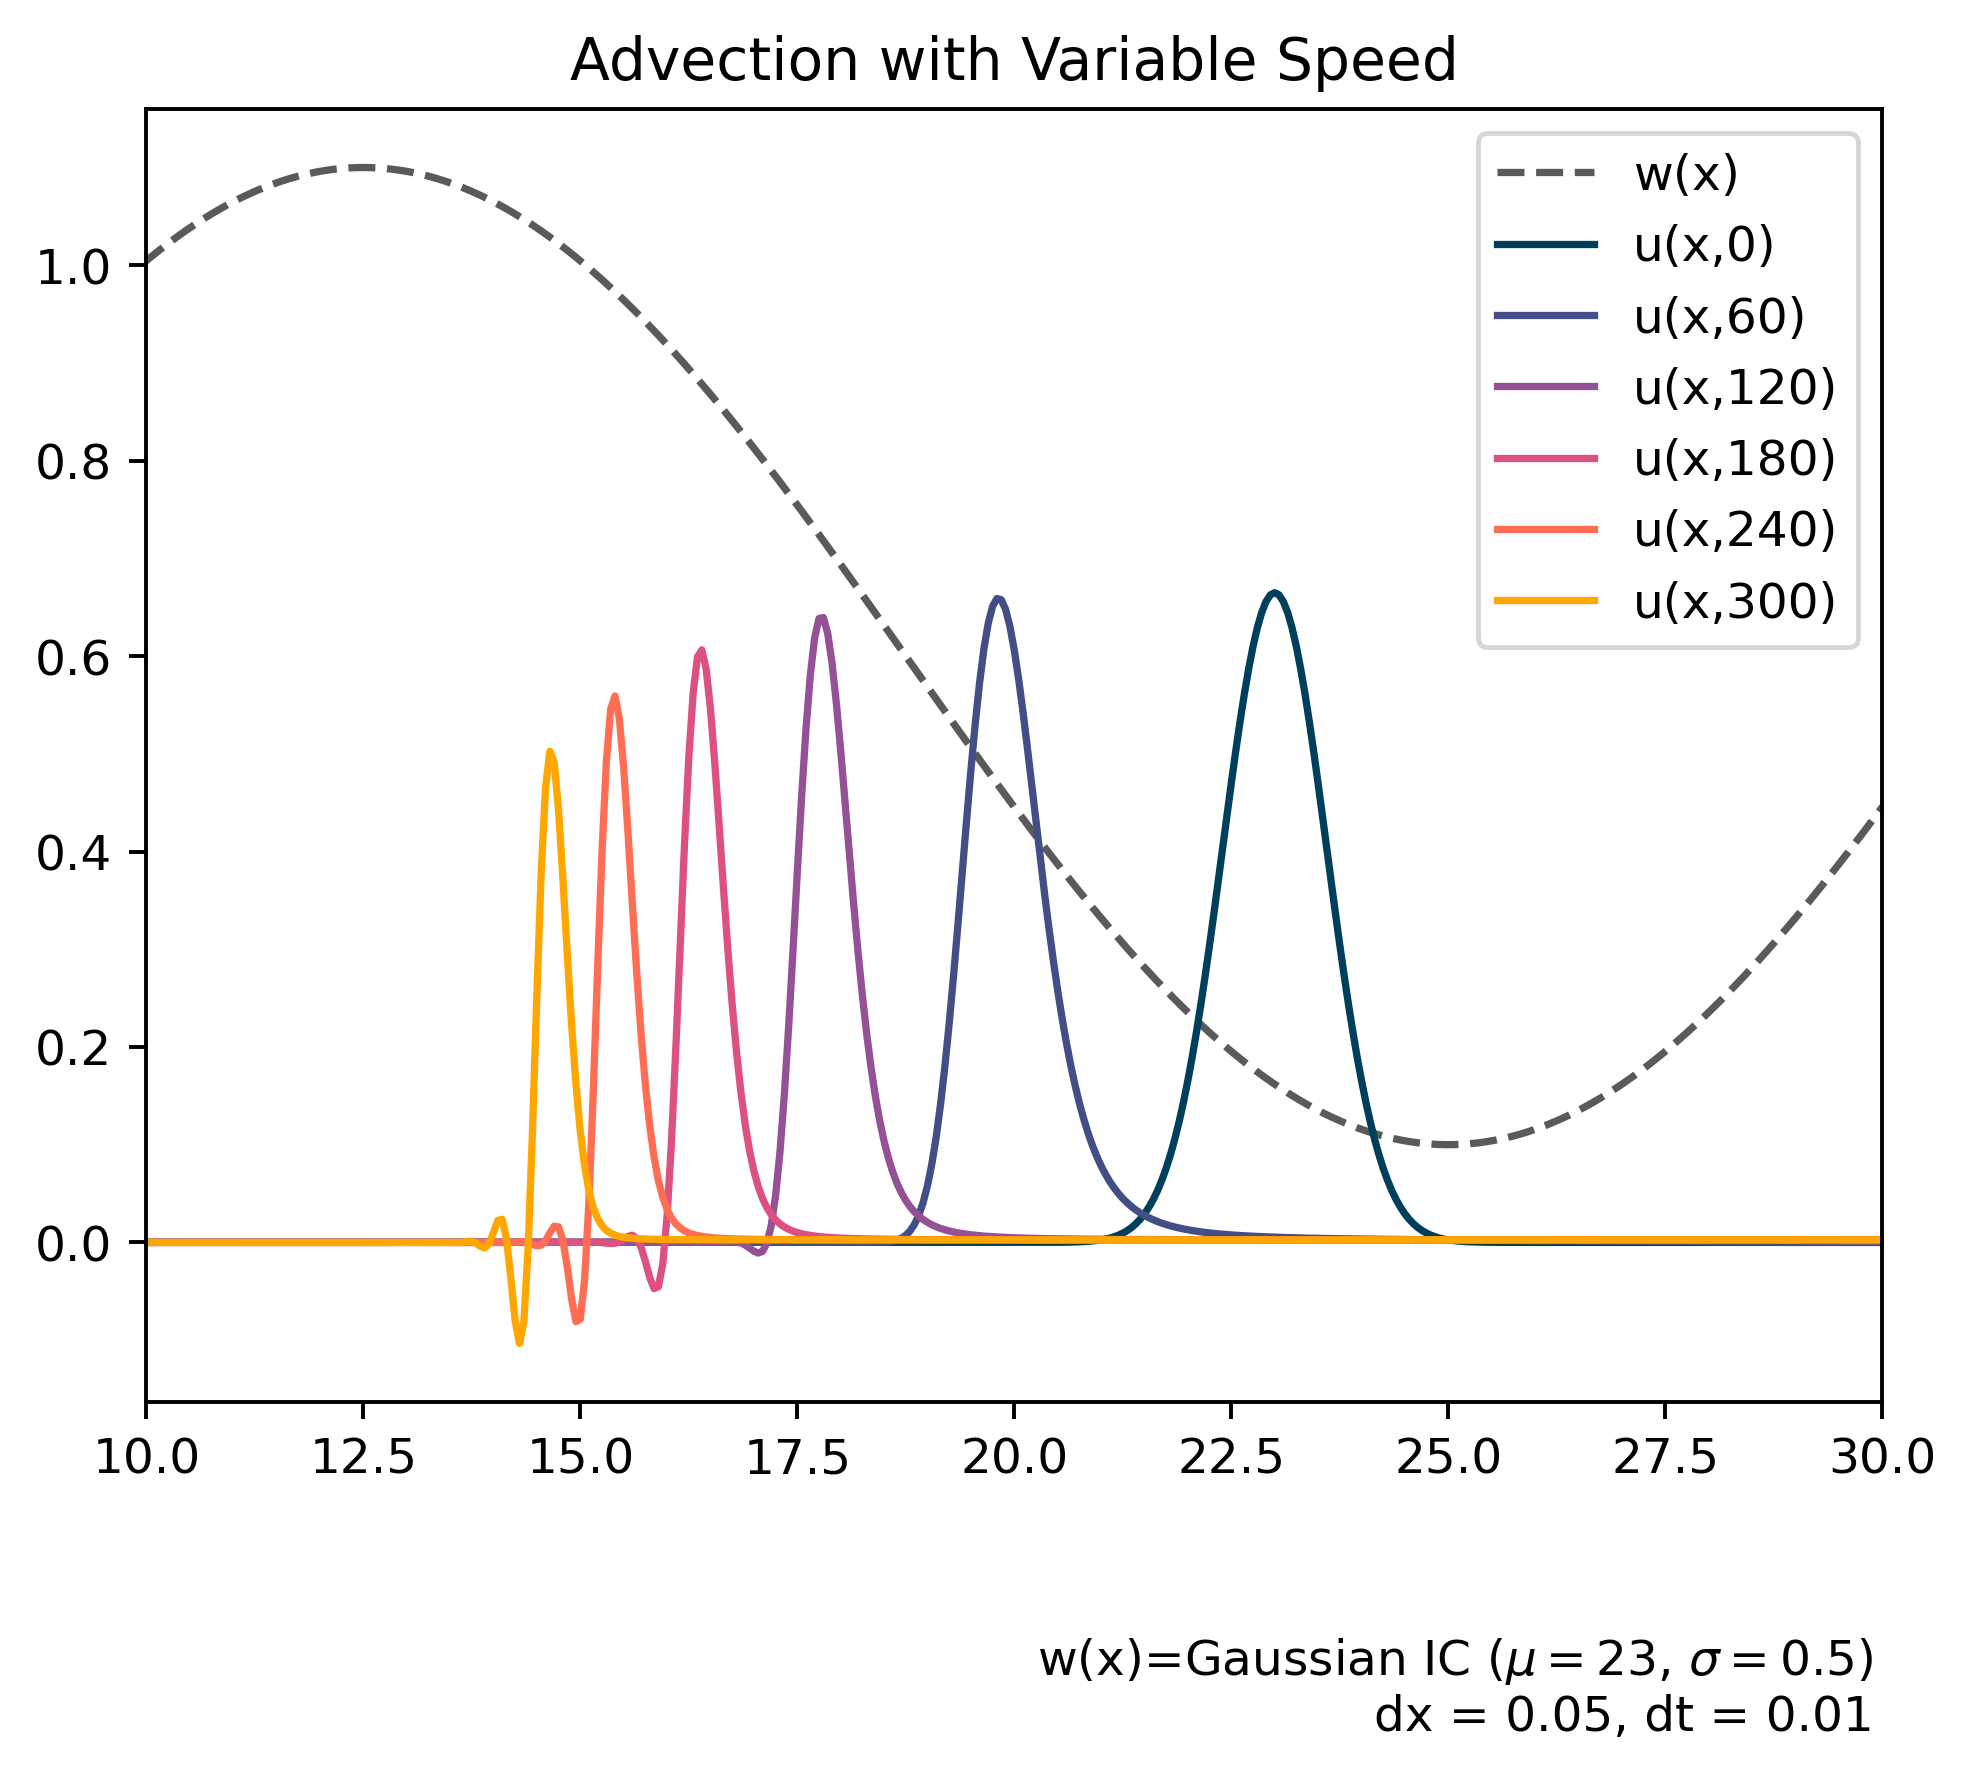

In [10]:
# Advection with variable speed
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

fig4, ax4 = plt.subplots()
ax4.plot(Xs,w[0][1], color = "#5a5a5a", label = r"$\mathrm{w(x)}$", linestyle = "dashed")
ax4.plot(Xs,t0, label = 'u(x,0)', color = "#003f5c" )
ax4.plot(Xs,t1, label = f'u(x,{int(0.2*T)})', color = "#444e86")
ax4.plot(Xs,t2, label = f'u(x,{int(0.4*T)})', color = "#955196")
ax4.plot(Xs,t3, label = f'u(x,{int(0.6*T)})', color = "#dd5182")
ax4.plot(Xs,t4, label = f'u(x,{int(0.8*T)})', color = "#ff6e54")
ax4.plot(Xs,t5, label =f'u(x,{int(T)})', color = "#ffa600")
ax4.legend(loc="upper right")
ax4.text(29.9,-0.5,"w(x)="+
         "Gaussian IC (" + r'$\mu = 23$' + ", " + r'$\sigma = 0.5)$' + 
         f"\ndx = {dx}, dt = {dt}", ha = 'right')
ax4.set_title("Advection with Variable Speed")
ax4.axis(xmin = 10, xmax = 30)

In [11]:
# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

Area under u(x,0) = 1.0000000000000002
Area under u(x,60) = 0.7792795317052899
Area under u(x,120) = 0.5287335829487156
Area under u(x,180) = 0.38943306821815143
Area under u(x,240) = 0.3007411616552028
Area under u(x,300) = 0.23959897942307748


## Modified advection scheme

In [12]:
# Second-order upwinding approach with normalization by area under the curve
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        c = (mean_sl**2) * wx[0][1][i] / w[0][1][i] / dt  # Advection coefficient
        p = c * dt / dx /2 # Courant number
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            else:
                u[j + 1][1][i] = -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i])
    area = integrate(u = u[j + 1][1],
                     dx = dx,
                     x_vals = Xs)
    u[j+1][1] = u[j+1][1]/area

NameError: name 'ax' is not defined

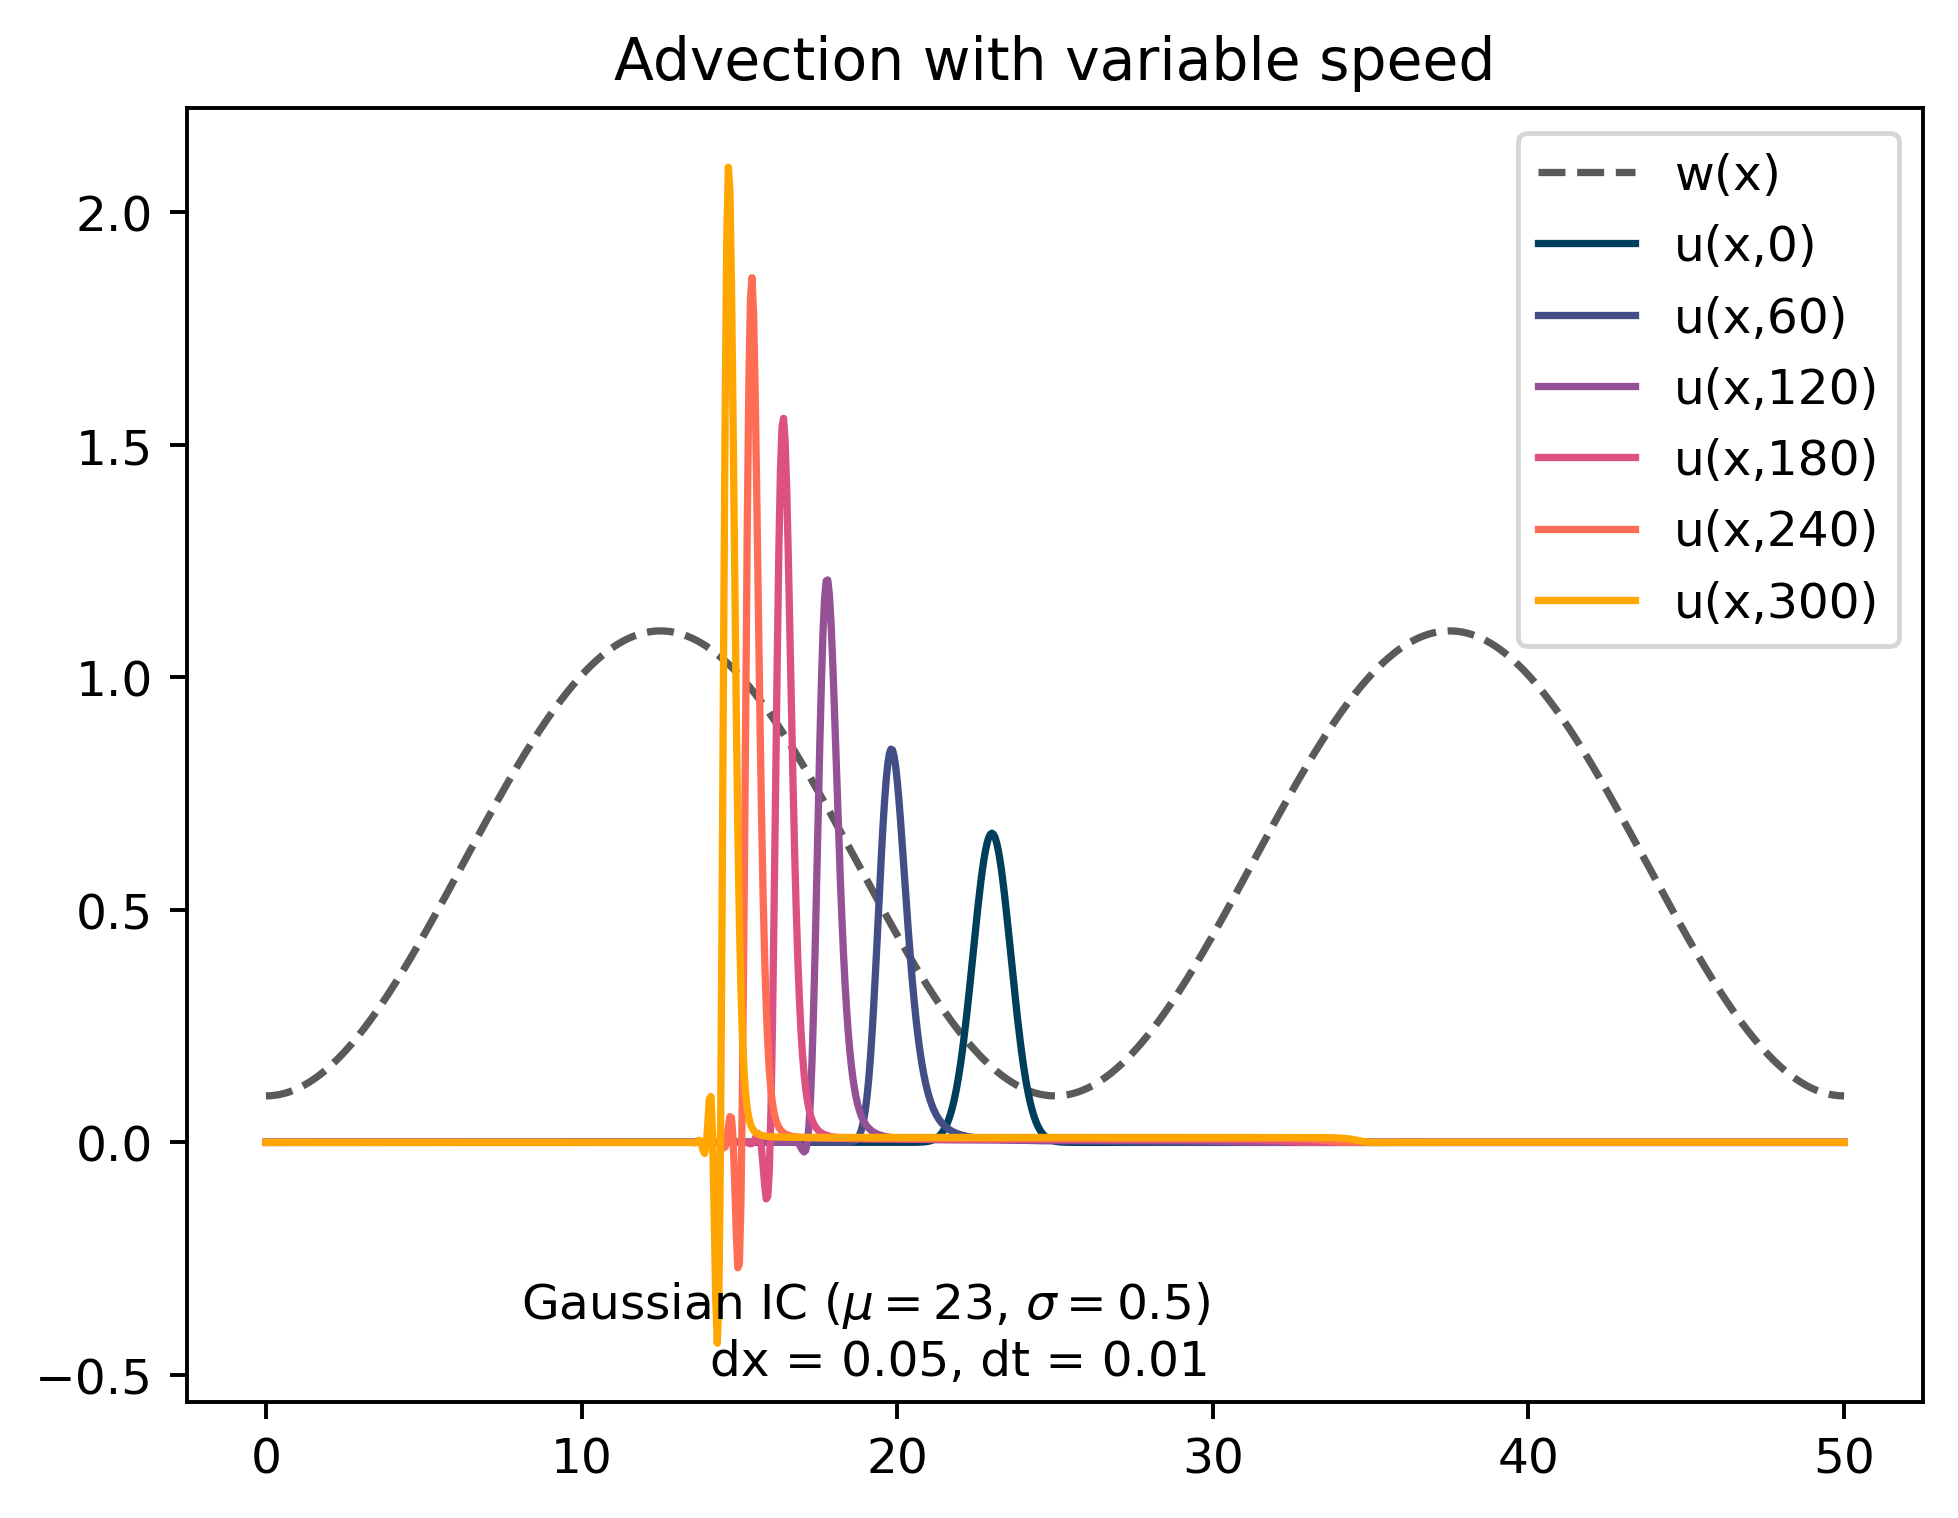

In [13]:
# Advection with variable speed
# Density is normalized by the area under the curve
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

fig5, ax5 = plt.subplots()
ax5.plot(Xs,w[0][1], color = "#5a5a5a", label = r"$\mathrm{w(x)}$", linestyle = "dashed")
ax5.plot(Xs,t0, label = 'u(x,0)', color = "#003f5c" )
ax5.plot(Xs,t1, label = f'u(x,{int(0.2*T)})', color = "#444e86")
ax5.plot(Xs,t2, label = f'u(x,{int(0.4*T)})', color = "#955196")
ax5.plot(Xs,t3, label = f'u(x,{int(0.6*T)})', color = "#dd5182")
ax5.plot(Xs,t4, label = f'u(x,{int(0.8*T)})', color = "#ff6e54")
ax5.plot(Xs,t5, label =f'u(x,{int(T)})', color = "#ffa600")
ax5.legend(loc="upper right")
ax5.text(29.9,-0.5,"Gaussian IC (" + r'$\mu = 23$' + ", "
         + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}", ha = 'right')
ax5.set_title("Advection with variable speed")
ax.axis(xmin = 10, xmax = 30)

In [ ]:
# Checking for conservation
for j in range(0,Nt):
    t  = (j+1)/Nt*T
    step = 0.2 * T
    if t % step == 0 or j == 0:
        res = integrate(u = u[j][1],
                  dx = dx,
                  x_vals = Xs)
        print(f"Area under u(x,{int(t)}) = {res}")

# Advection and Diffusion

In [ ]:
# Bounds
start = 0 # start bound
stop = 50 # stop bound

In [ ]:
# Model parameters
dt = 0.01 # delta t
dx = 0.05  # delta x
T = 1000 # Total time
Nt = int(T / dt)  # Number of time steps
Nx = int((abs(stop-start))/dx)  # Number of x steps
mean_sl = 0.04 #mean step length
k = (mean_sl**2)/2/dt # diffusion coefficient equal to mean step length squared
r = k * dt / dx / dx  # Fourier number

In [ ]:
# CFL flag
if r > 0.5:
    print("WARNING: Fourier number > 0.5")

In [ ]:
# Initializing x values where u(x,t) will be calculated
Xs = np.arange(start, stop + dx, dx)

# Initializing array with Nt row, Nx columns, and [x,u(x,t)] per cell
u = np.zeros((Nt, 2, len(Xs)))

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

In [ ]:
def preference(x):
    pi = math.pi
    res = 0.1 + math.sin(2 * pi * x / 50) ** 2  # w1
    res = np.float64(res)
    return res

# Derivative of Habitat Preference Function
def preference_slope(x):
    pi = math.pi
    res = (2 * pi / 25) * math.cos(pi * x / 25) * math.sin(pi * x / 25)  # w1
    res = np.float64(res)
    return res

In [ ]:
#Habitat Preference Function
w = np.zeros((1,2,len(Xs)))
w[0][0] = Xs
for i in range(0,len(Xs)):
    w[0][1][i] = preference(w[0][0][i])

#Spatial Derivative of Habitat Preference Function
wx = np.zeros((1,2,len(Xs)))
wx[0][0] = Xs
for i in range(0,len(Xs)):
    wx[0][1][i] = preference_slope(w[0][0][i])

# Populating x values in array u
for j in range(0, Nt):
    u[j][0]=Xs

In [ ]:
#Setting Initial Condition
IC=[]
for i in range(0, len(Xs)):
    x = Xs[i]
    res = gaussian(x = x,
                   mu = 28,
                   sigma = 0.5) #Gaussin IC
    res = np.float64(res)
    IC.append(res)
u[0][1] = IC #Populating initial condition in array u

In [ ]:
# Finite difference scheme for advection and diffusion
for j in range(0,Nt-1):
    for i in range(0,Nx+1):
        c = (mean_sl**2) * wx[0][1][i] / w[0][1][i] / dt  # Advection coefficient
        p = c * dt / dx /2 # Courant number
        if p > 1: # CFL flag
            print("WARNING: Courant number > 1")
        if c > 0:
            if i == 0:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx]) -p * (3*u[j][1][i] - 4 * u[j][1][Nx] + u[j][1][Nx-1]) + u[j][1][i]
            elif i == 1:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1]) -p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][Nx]) + u[j][1][i]
            elif i == Nx:
                u[j + 1][1][i] = r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1]) - p * (3 * u[j][1][i] - 4 * u[j][1][i - 1] + u[j][1][i - 2]) + u[j][1][i]
            else:
                u[j + 1][1][i] = r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1]) -p * (3*u[j][1][i] - 4 * u[j][1][i-1] + u[j][1][i-2]) + u[j][1][i]
        else:
            if i == Nx:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][1] + 4 * u[j][1][0] - 3 * u[j][1][Nx]) + r * (u[j][1][0] - 2 * u[j][1][i] + u[j][1][i - 1])
            elif i == (Nx-1):
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][0] + 4 * u[j][1][Nx] - 3 * u[j][1][Nx-1]) + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])
            elif i == 0:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i + 2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i]) + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][Nx])
            else:
                u[j + 1][1][i] = u[j][1][i] - p * (-u[j][1][i+2] + 4 * u[j][1][i + 1] - 3 * u[j][1][i]) + r * (u[j][1][i + 1] - 2 * u[j][1][i] + u[j][1][i - 1])
    area = integrate(u = u[j + 1][1],
                     dx = dx,
                     x_vals = Xs)
    u[j+1][1] = u[j+1][1]/area

In [ ]:
# Advection with variable speed
t0 = u[0][1]
t1 = u[int(0.2*Nt)][1]
t2 = u[int(0.4*Nt)][1]
t3 = u[int(0.6*Nt)][1]
t4 = u[int(0.8*Nt)][1]
t5 = u[int(Nt-1)][1]

fig6, ax6 = plt.subplots()
ax6.plot(Xs,w[0][1], color = "#5a5a5a", label = r"$\mathrm{w(x)}$", linestyle = "dashed")
ax6.plot(Xs,t0, label = 'u(x,0)', color = "#003f5c" )
ax6.plot(Xs,t1, label = f'u(x,{int(0.2*T)})', color = "#444e86")
ax6.plot(Xs,t2, label = f'u(x,{int(0.4*T)})', color = "#955196")
ax6.plot(Xs,t3, label = f'u(x,{int(0.6*T)})', color = "#dd5182")
ax6.plot(Xs,t4, label = f'u(x,{int(0.8*T)})', color = "#ff6e54")
ax6.plot(Xs,t5, label =f'u(x,{int(T)})', color = "#ffa600")
ax6.legend(loc="upper right")
ax6.text(29.9,-0.5,"Gaussian IC (" + r'$\mu = 28$' + ", "
         + r'$\sigma = 0.5)$' + f"\ndx = {dx}, dt = {dt}", ha = 'right')
ax6.set_title("Advection with variable speed")